In [1]:
from IPython.display import Image

In [2]:
%matplotlib notebook
from sympy import *

In [3]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from qutip import *
from scipy.linalg import expm

In [5]:
from sympy.solvers.ode import dsolve

In [6]:
init_printing()

In [7]:
sz, t,\
sx, spl, sm, om_q, om_d, d_12, d_02, phi, Hq, Hd, U, H_rwa, H_rot =\
symbols("\sigma_{z} \
t sigma_x sigma_+ sigma_- \omega_q \omega_d delta_12 delta_02 phi H_q H_d U H_{RWA}, H_{rot}", real=True)

In [8]:
sy = symbols("\sigma_y")

In [9]:
t, om_q, om_d, Om, g_p, g, Om_12, Om_02, om_12, om_02, om_d12, om_d02 \
= symbols("t \omega_q \omega_d Omega gamma_p gamma Omega_12 Omega_02 \
omega_12 omega_02 omega^d_12 omega^d_02", real=True, positive=True)

## Hamiltonian of $\Lambda$-system, eigenstates, eigenvectors

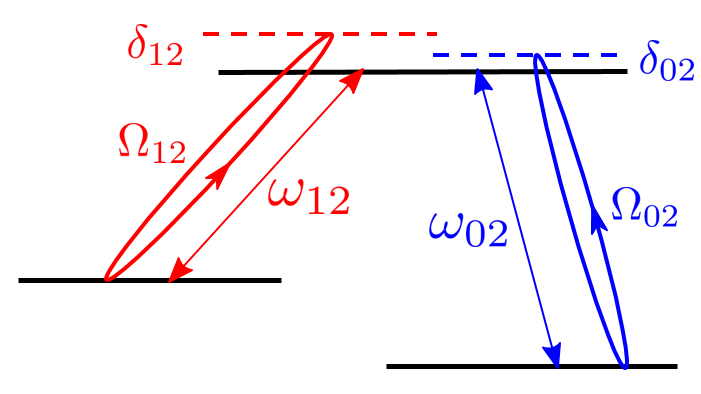

In [10]:
Image('./ATS.png')

In [11]:
sy = Matrix([[0, -I],[I,0]])
sz = Matrix([[1,0],[0,-1]])
sx = Matrix([[0, 1],[1,0]])

In [12]:
s0 = Matrix([[1],[0],[0]])
s1 = Matrix([[0],[1],[0]])
s2 = Matrix([[0],[0],[1]])

In [13]:
s00 = Matrix([[1,0,0],[0,0,0],[0,0,0]])
s11 = Matrix([[0,0,0],[0,1,0],[0,0,0]])
s22 = Matrix([[0,0,0],[0,0,0],[0,0,1]])

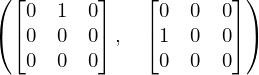

In [14]:
s10 = Matrix([[0,0,0],[1,0,0],[0,0,0]])
s01 = s10.transpose()
s01,s10

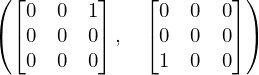

In [15]:
s20 = Matrix([[0,0,0],[0,0,0],[1,0,0]])
s02 = s20.transpose()
s02,s20

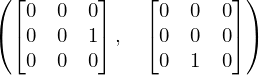

In [16]:
s21 = Matrix([[0,0,0],[0,0,0],[0,1,0]])
s12 = s21.transpose()
s12,s21

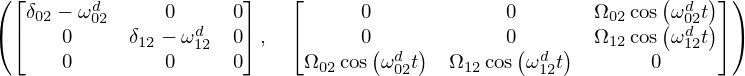

In [17]:
H_a = (-om_02*s00-om_12*s11).subs({om_02: om_d02-d_02}).subs({om_12: om_d12-d_12})
H_d = Om_12*cos(om_d12*t)*(s12+s21) + Om_02*cos(om_d02*t)*(s02+s20)
H_a, H_d

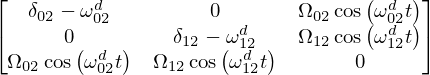

In [18]:
H = H_a + H_d
H

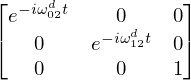

In [19]:
U = exp(-I*om_d02*t)*(s00) + exp(-I*om_d12*t)*(s11)+1*s22
U

In [20]:
H_rot = U*H*U.conjugate() - I*U*diff(U,t).conjugate()

In [21]:
H_rot = H_rot.subs({cos(om_d02*t): exp(-I*om_d02*t)/2+exp(I*om_d02*t)/2, \
            cos(om_d12*t): exp(-I*om_d12*t)/2+exp(I*om_d12*t)/2,})

In [22]:
H_rot = expand(H_rot)

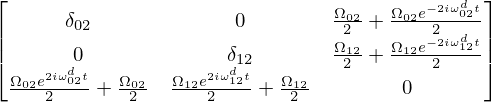

In [23]:
H_rot

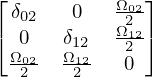

In [201]:
H_rwa = H_rot.subs({exp(2*I*om_d02*t)/2: 0, exp(2*I*om_d12*t)/2: 0, \
                    exp(-2*I*om_d02*t)/2: 0, exp(-2*I*om_d12*t)/2: 0})
H_rwa

In [202]:
d = symbols('delta')

In [203]:
H_rwa = H_rwa.subs({d_12: 0, d_02: d})

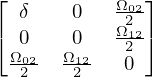

In [204]:
H_rwa

TypeError: Cannot set values of <class 'sympy.matrices.immutable.ImmutableDenseMatrix'>

### Characteristic equation

In [28]:
l = symbols('\lambda')

In [29]:
Mchar = H_rwa-l*Matrix([[1,0,0],[0,1,0],[0,0,1]])

In [30]:
eq_char = Eq(Mchar.det())

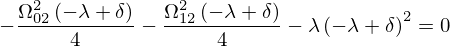

In [31]:
eq_char

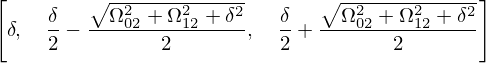

In [32]:
solve(eq_char,l)

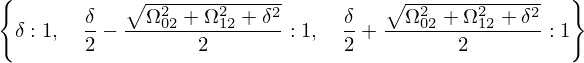

In [33]:
H_rwa.eigenvals()

In [34]:
evs = [simplify(bunch[2][0]) for bunch in H_rwa.eigenvects()]

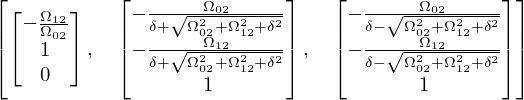

In [35]:
evs

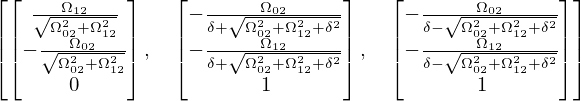

In [36]:
evs[0] = -simplify(evs[0]/evs[0].norm())
evs

In [37]:
theta, Phi, Om = symbols('theta Phi Omega')

In [38]:
trig_subs = {Om_02: Om*sin(2*Phi)*sin(theta),\
             Om_12: Om*sin(2*Phi)*cos(theta),\
                 d: Om*cos(2*Phi) }
evs = [trigsimp(simplify(ev.subs(trig_subs))) for ev in evs]

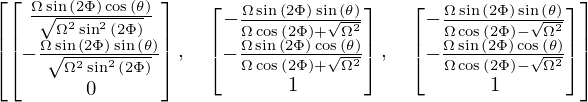

In [39]:
evs

In [40]:
evst = [Matrix([[cos(theta)], [-sin(theta)], [0]]),
       Matrix([[sin(Phi)*sin(theta)], [sin(Phi)*cos(theta)], [-cos(Phi)]]),
       Matrix([[sin(Phi)*cos(theta)], [cos(Phi)*cos(theta)], [sin(Phi)]])] 

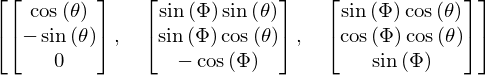

In [41]:
evst

### Master equation 

In [205]:
rho_00, rho_11, rho_22, rho_01, rho_02, rho_12, rho_21, rho_20, rho_10 =\
symbols("rho_00 rho_11 rho_22 rho_01 rho_02 rho_12 rho_21 rho_20 rho_10 ")

In [206]:
rho_00  = Function('rho_00', real=True)(t)
rho_i01 = Function('rho^i_01', real=True)(t)
rho_r01 = Function('rho^r_01', real=True)(t)
rho_11  = Function('rho_11', real=True)(t)
rho_r02 = Function('rho^r_02', real=True)(t)
rho_i02 = Function('rho^i_02', real=True)(t)
rho_r12 = Function('rho^r_12', real=True)(t)
rho_i12 = Function('rho^i_12', real=True)(t)
rho_22  = Function('rho_22', real=True)(t)

In [207]:
r_11, r_22, r_i01, r_r01, r_i02, r_r02, r_i12, r_r12 = symbols('r_11 r_22 r^i_01 r^r_01 r^i_02 r^r_02 r^i_12 r^r_12', real=True)

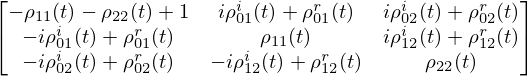

In [208]:
rho = Matrix([[1-rho_11-rho_22, rho_r01+I*rho_i01, rho_r02+I*rho_i02],\
              [rho_r01-I*rho_i01, rho_11, rho_r12+I*rho_i12],\
              [rho_r02-I*rho_i02, rho_r12-I*rho_i12, rho_22]])
rho

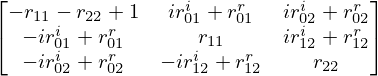

In [209]:
rho = Matrix([[1-r_11-r_22, r_r01+I*r_i01, r_r02+I*r_i02],\
              [r_r01-I*r_i01, r_11, r_r12+I*r_i12],\
              [r_r02-I*r_i02, r_r12-I*r_i12, r_22]])
rho

### Dissipation and Decoherence operators 

In [210]:
g_02, g_12, g_01 = symbols('g_02 g_12 g_01',real=True, positive=True) #dephasings
G_02, G_12, G_01 = symbols("Gamma_02 Gamma_12 Gamma_01",real=True, positive=True) #radiative relaxations

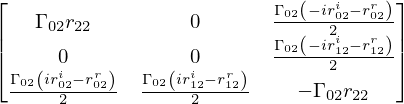

In [211]:
Damp_02 = G_02/2*(2*s02*rho*s20-s20*s02*rho-rho*s20*s02)
Damp_02

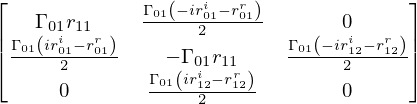

In [212]:
Damp_01 = G_01/2*(2*s01*rho*s10-s10*s01*rho-rho*s10*s01)
Damp_01

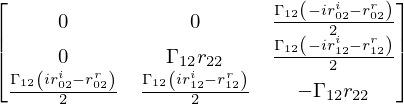

In [213]:
Damp_12 = G_12/2*(2*s12*rho*s21-s21*s12*rho-rho*s21*s12)
Damp_12

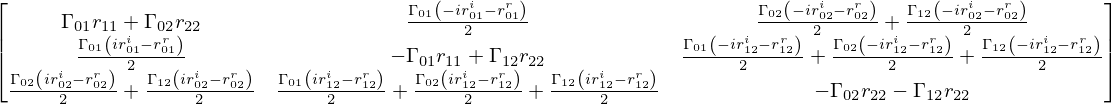

In [214]:
Damp_01 + Damp_02 + Damp_12 

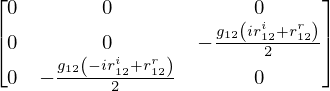

In [215]:
Deph_12 = -g_12/2*(s11*rho*s22+s22*rho*s11) 
Deph_12

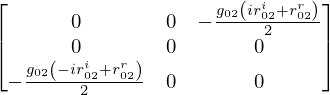

In [216]:
Deph_02 = -g_02/2*(s00*rho*s22+s22*rho*s00) 
Deph_02

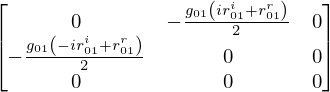

In [217]:
Deph_01 = -g_01/2*(s00*rho*s11+s11*rho*s00)
Deph_01

In [218]:
Lind = simplify(Damp_01 + Damp_02 + Damp_12 + Deph_01 + Deph_02 + Deph_12)

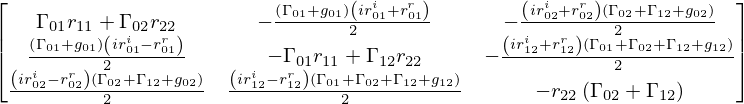

In [219]:
Lind

In [220]:
eq_lhs = -I*(H_rwa*rho-rho*H_rwa)+Lind
eq_rhs = Matrix([[0,0,0],[0,0,0],[0,0,0]])

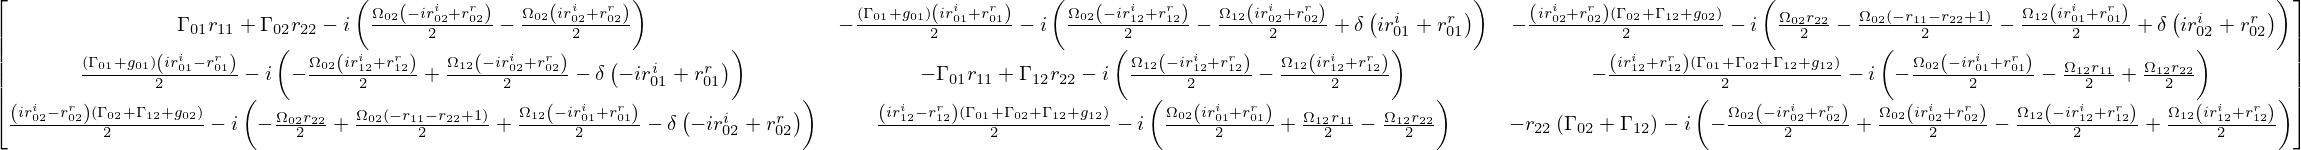

In [221]:
eq_lhs

In [222]:
st_eq = [simplify(Eq(lhs).subs({G_01: 0})) for lhs in eq_lhs]

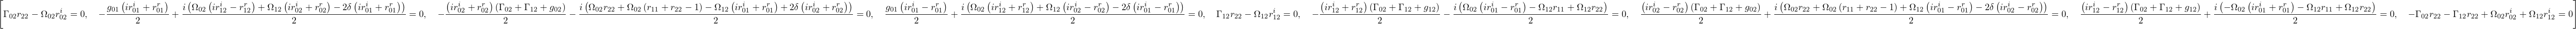

In [223]:
simplify(st_eq)

In [224]:
st_sol = solve(st_eq[:4], r_i12, r_r12, r_i02, r_r02)#, r_i12, r_r12, r_i02, r_r02)

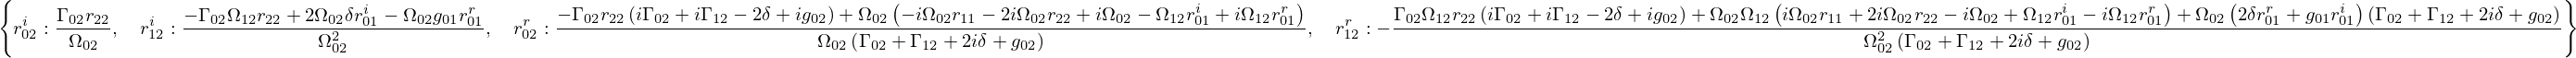

In [225]:
st_sol

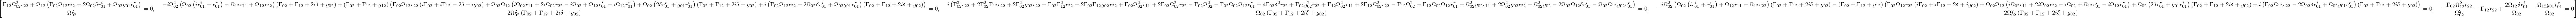

In [226]:
st_eq2=[simplify(eq.subs(st_sol)) for eq in st_eq[4:]]
st_eq2

In [227]:
ks = [1,2,3,4]
st_sol2 = solve([st_eq2[k] for k in ks], r_22, r_11, r_i01, r_r01)

In [228]:
st_sol2.keys()

dict_keys([r_22, r_11, r^i_01, r^r_01])

In [229]:
r_22_sol = simplify(st_sol2[r_22])
r_11_sol = simplify(st_sol2[r_11])
r_i01_sol = simplify(st_sol2[r_i01])
r_r01_sol = simplify(st_sol2[r_r01])

In [230]:
st_sol1 = {k: sol.subs(st_sol2) for (k, sol) in st_sol.items()}

In [231]:
st_sol1 = simplify(st_sol1)

In [232]:
st_sol1;

In [233]:
r_r12_sol = simplify(st_sol1[r_r12])

In [234]:
r_i12_sol = simplify(st_sol1[r_i12])

In [235]:
r_r02_sol = simplify(st_sol1[r_r02])

In [236]:
r_i02_sol = simplify(st_sol1[r_i02])

In [237]:
D = symbols("D")

In [238]:
sub = {r_i02_sol.args[4]: 1/D}

In [239]:
ls = [r_22_sol, r_11_sol, r_i01_sol, r_r01_sol,r_r12_sol,r_i12_sol,r_r02_sol,r_i02_sol]

In [240]:
rs_l = [r_11, r_22, r_i01, r_r01, r_i02, r_r02, r_i12, r_r12]

In [ ]:
[s.subs(sub) for s in ls]

In [242]:
D_ex = r_i02_sol.args[4]

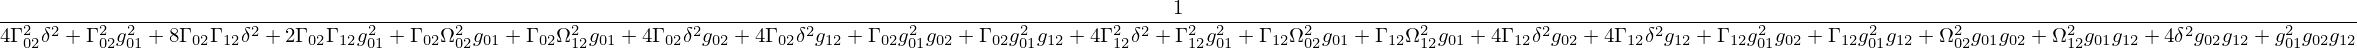

In [243]:
simplify(1/D_ex)

In [244]:
lb_f = [lambdify((G_02, G_12, g_01, g_02, g_12, Om_02, Om_12, d), sol, "numpy") for sol in ls]

In [308]:
Oms_12 = np.linspace(0.01,5.01,26)
Oms_02 = np.linspace(0,2,21)
ds = np.linspace(-100,100,100001)
Om12 = 5
Om02 = 0.2
G02 = 2
G12 = 1
g01 = 1e-3
g02 = 1e-3
g12 = 1e-3
d = 0

<IPython.core.display.Javascript object>


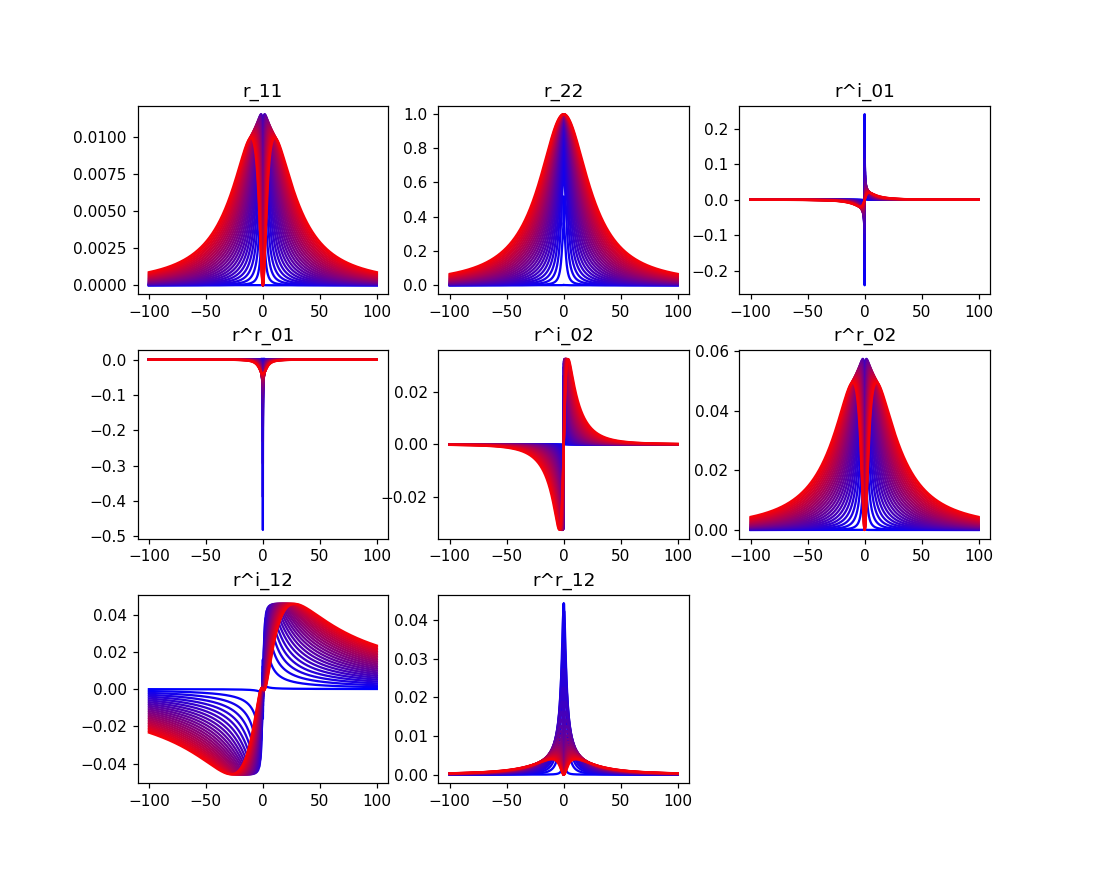

In [309]:
fig = plt.figure(2, figsize=(10,8))
plt.tight_layout()
gs = gridspec.GridSpec(3,3,fig, wspace=0.2, hspace=0.3)
for i, sol in enumerate(ls):
    ax = fig.add_subplot(gs[i//3, i%3])
    ax.set_title(str(rs_l[i].as_expr()))
    [ax.plot(ds, lb_f[i](G02,G12,g01,g02,g12,Om12,Om02,ds), color = (j/len(Oms_12),0, 1-j/len(Oms_12))) for j,Om12 in enumerate(Oms_12)]
    #[plt.plot(Oms_12, lb_f[0](1,1,0.1,0.5,0.5,Om02,Oms_12,0)) for Om02 in Oms_02];
#[ax.plot(Oms_12, lb_f[0](0.1,0.1,0.1,0.2,0.2,20,Oms_12,d)) for d in ds];
fig.tight_layout()

<IPython.core.display.Javascript object>


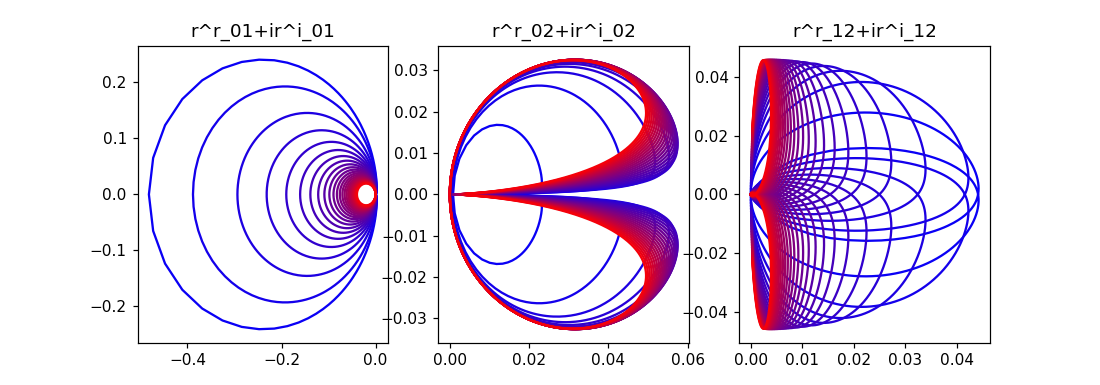

In [310]:
fig = plt.figure(3, figsize=(10,3.5))
plt.tight_layout()
gs = gridspec.GridSpec(1,3,fig, wspace=0.2, hspace=0.3)
for i in range(1,4):
    ax = fig.add_subplot(gs[0, i%3-1])
    ax.set_title(str(rs_l[2*i+1].as_expr())+'+i'+str(rs_l[2*i].as_expr()))
    [ax.plot(lb_f[2*i+1](G02,G12,g01,g02,g12,Om12,Om02,ds),lb_f[2*i](G02,G12,g01,g02,g12,Om12,Om02,ds) , color = (j/len(Oms_12),0, 1-j/len(Oms_12))) for j,Om12 in enumerate(Oms_12)]

### First-order susceptibility 